# Run motion analyses on ADHD data

In [1]:
%matplotlib inline
import pandas as pd
from nilearn import datasets

from ddmra import run, utils

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/__init__.py:92: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
%%time
# Constants
n_subjects = 10  # 31
qc_thresh = 0.2
data = datasets.fetch_adhd(n_subjects=n_subjects)
n_iters = 100

# Prepare data
imgs = []
fd_all = []
for i in range(n_subjects):
    func = data.func[i]
    imgs.append(func)
    conf = data.confounds[i]
    df = pd.read_table(conf)
    motion = df[['motion-pitch', 'motion-roll', 'motion-yaw',
                 'motion-x', 'motion-y', 'motion-z']].values
    fd_all.append(utils.get_fd_power(
        motion, order=['p', 'r', 'ya', 'x', 'y', 'z'], unit='deg'))

CPU times: user 42.1 ms, sys: 6.64 ms, total: 48.8 ms
Wall time: 47.6 ms


/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/func.py:240: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  phenotypic = np.genfromtxt(phenotypic, names=True, delimiter=',',


/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


CPU times: user 3min 52s, sys: 30 s, total: 4min 22s
Wall time: 2min 2s


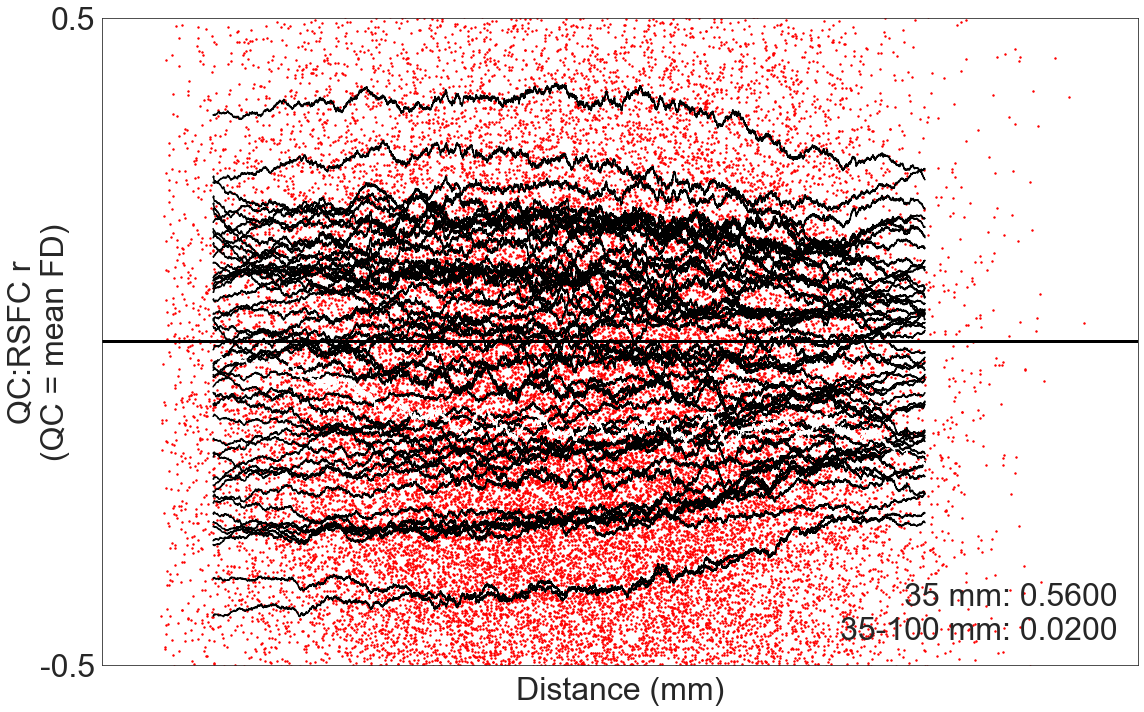

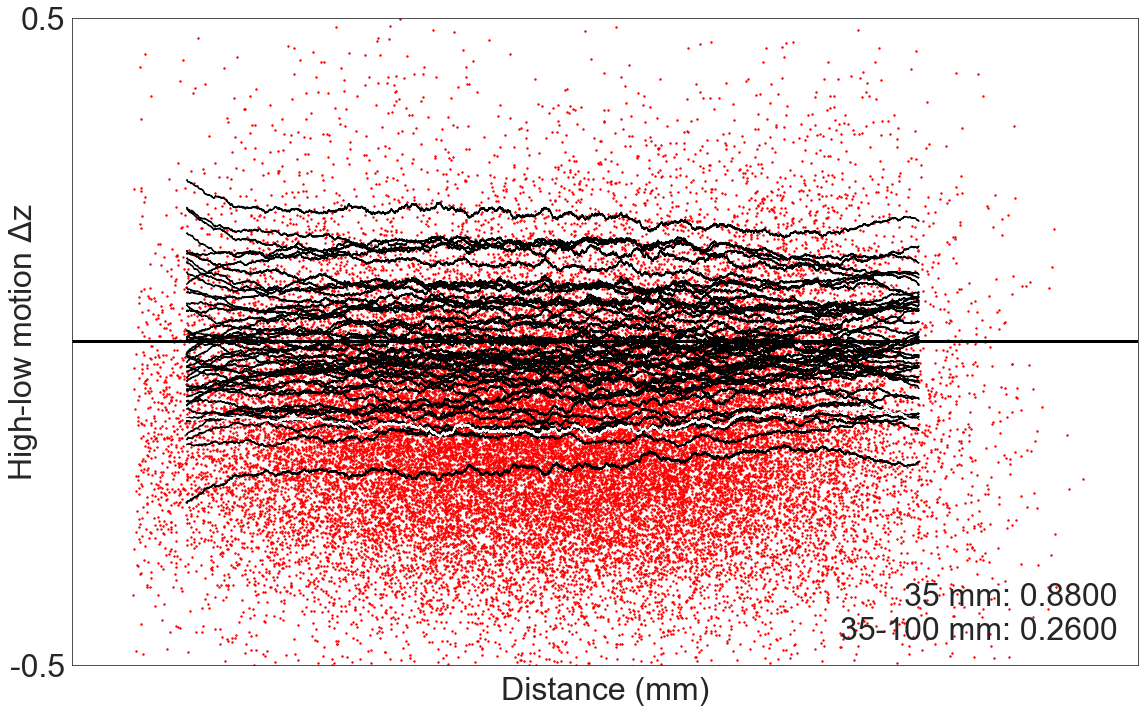

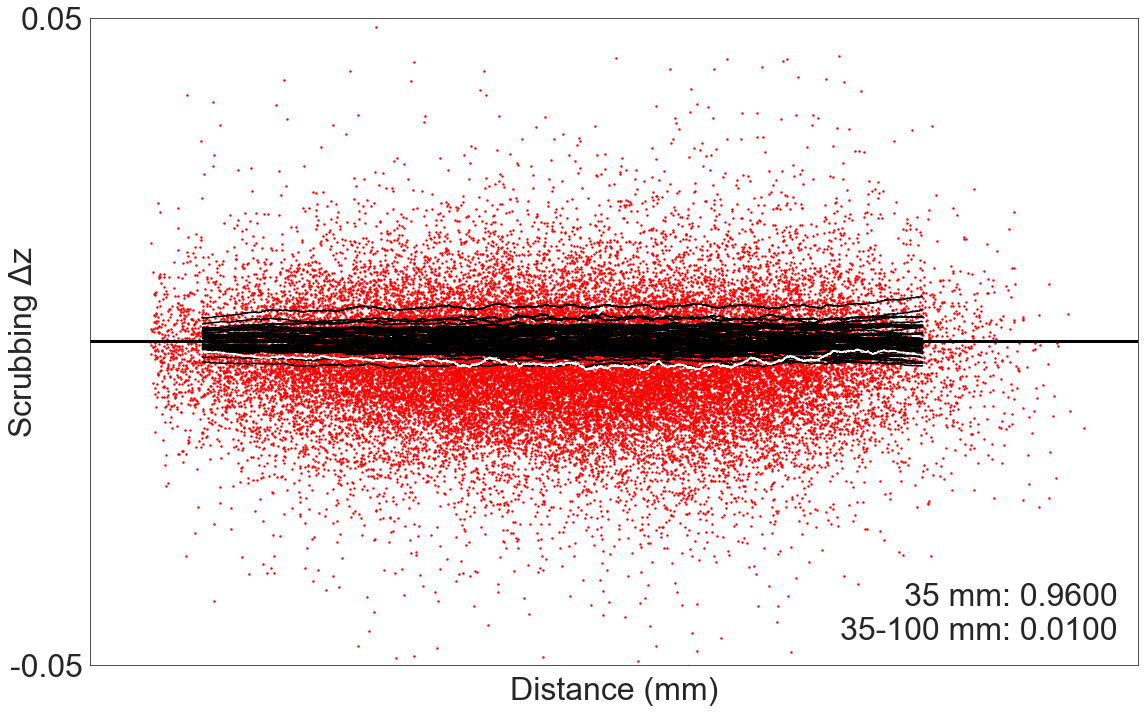

In [3]:
%%time
run(imgs, fd_all, out_dir='results/', n_iters=n_iters, qc_thresh=qc_thresh)